<a href="https://colab.research.google.com/github/Cynthiaudoye/Cynthiaudoye/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np     # Imort Numpy for numerical computations
import pandas as pd    # Import pandas for reading CSV
import matplotlib.pyplot as plt     # Import Matplotlib's pyplot for plotting
import seaborn as sns      # Import seaborn for statistical data visualisation

sns.set_theme()

In [19]:
data = pd.read_csv("/content/Assignment7_Oeson.csv")
#print(data)
data
#data.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


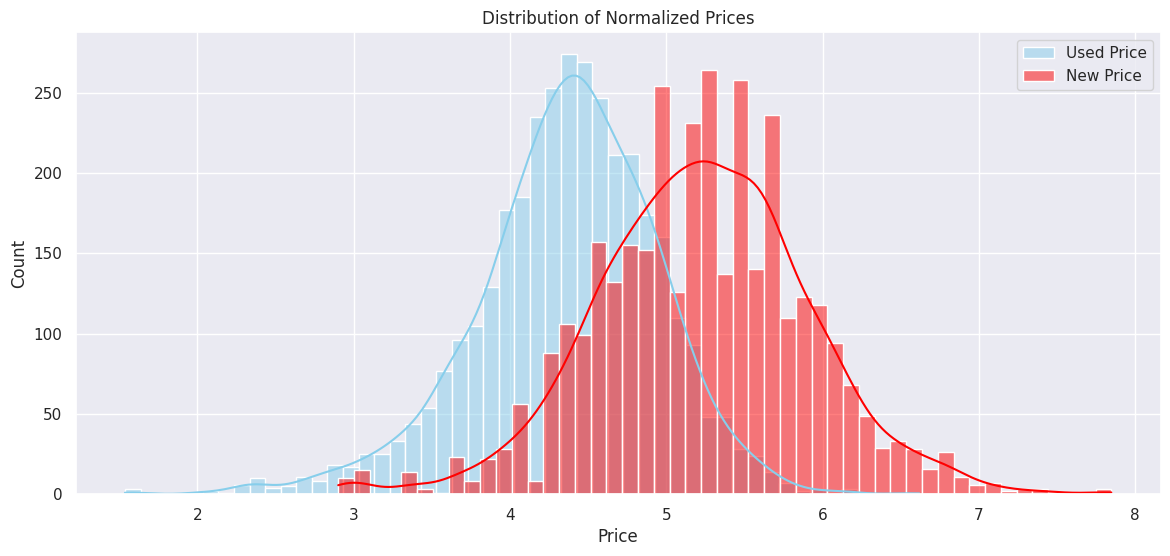

In [18]:
plt.figure(figsize=(14, 6))
sns.histplot(data['normalized_used_price'], color="skyblue", label='Used Price', kde=True, binwidth=0.1)
sns.histplot(data['normalized_new_price'], color="red", label='New Price', kde=True, binwidth=0.1)
plt.title('Distribution of Normalized Prices')
plt.xlabel('Price')
plt.legend()
plt.show()


**Distribution of Normalized Prices**: The distribution plots for both normalized used prices and new prices show a right-skewed distribution, indicating that most devices fall into the lower price range, with fewer devices having a higher price. The overlap in distributions suggests a correlation between new and used prices, where devices with higher new prices tend to retain their value better in the used market.

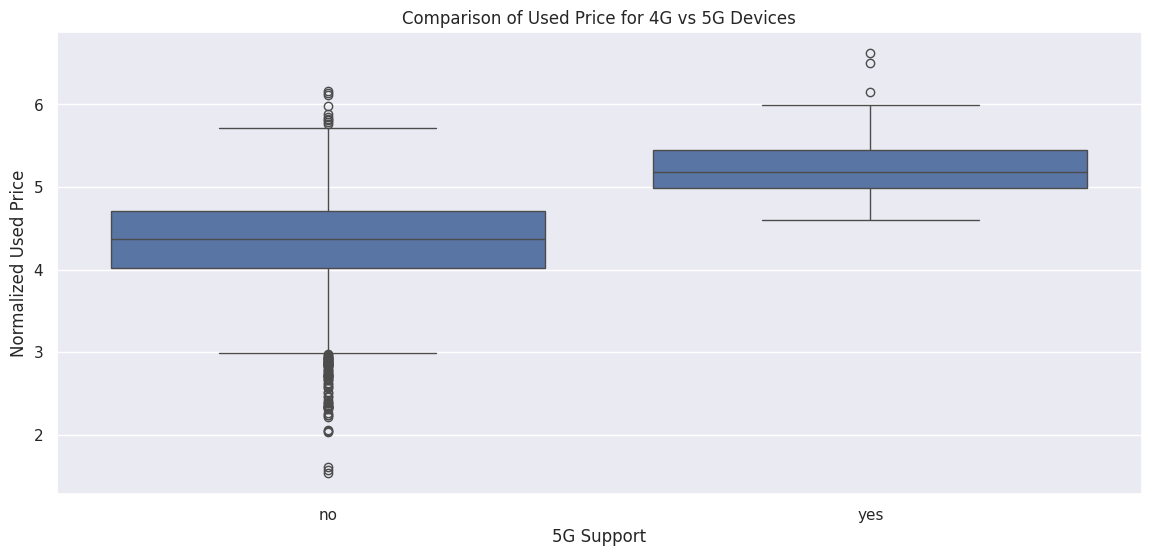

In [21]:
plt.figure(figsize=(14,6))
sns.boxplot(x='5g', y='normalized_used_price',data=data)
plt.title('Comparison of Used Price for 4G vs 5G Devices')
plt.xlabel('5G Support')
plt.ylabel('Normalized Used Price')
plt.show()

**Comparison of Used Price for 4G vs 5G Devices**: The boxplot comparing the normalized used prices of devices with and without 5G support shows that devices supporting 5G tend to have a higher used price than those with only 4G support. This indicates that 5G capability is a value-retaining feature in the used mobile market.

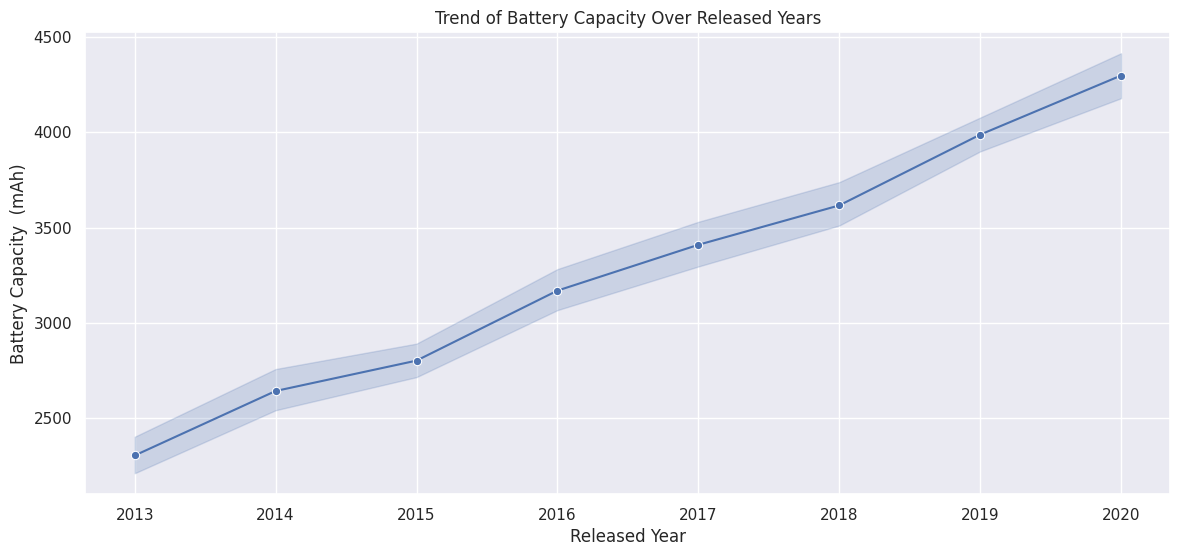

In [24]:
plt.figure(figsize=(14,6))
sns.lineplot(x='release_year', y='battery', data=data, marker='o')
plt.title('Trend of Battery Capacity Over Released Years')
plt.xlabel('Released Year')
plt.ylabel('Battery Capacity  (mAh)')
plt.show()

**Trend of Battery Capacity Over Release Years**: The line plot of battery capacity over release years shows a general upward trend, indicating that newer devices tend to have larger battery capacities. This trend reflects technological advancements in battery technology and increasing consumer demand for devices with longer battery life.

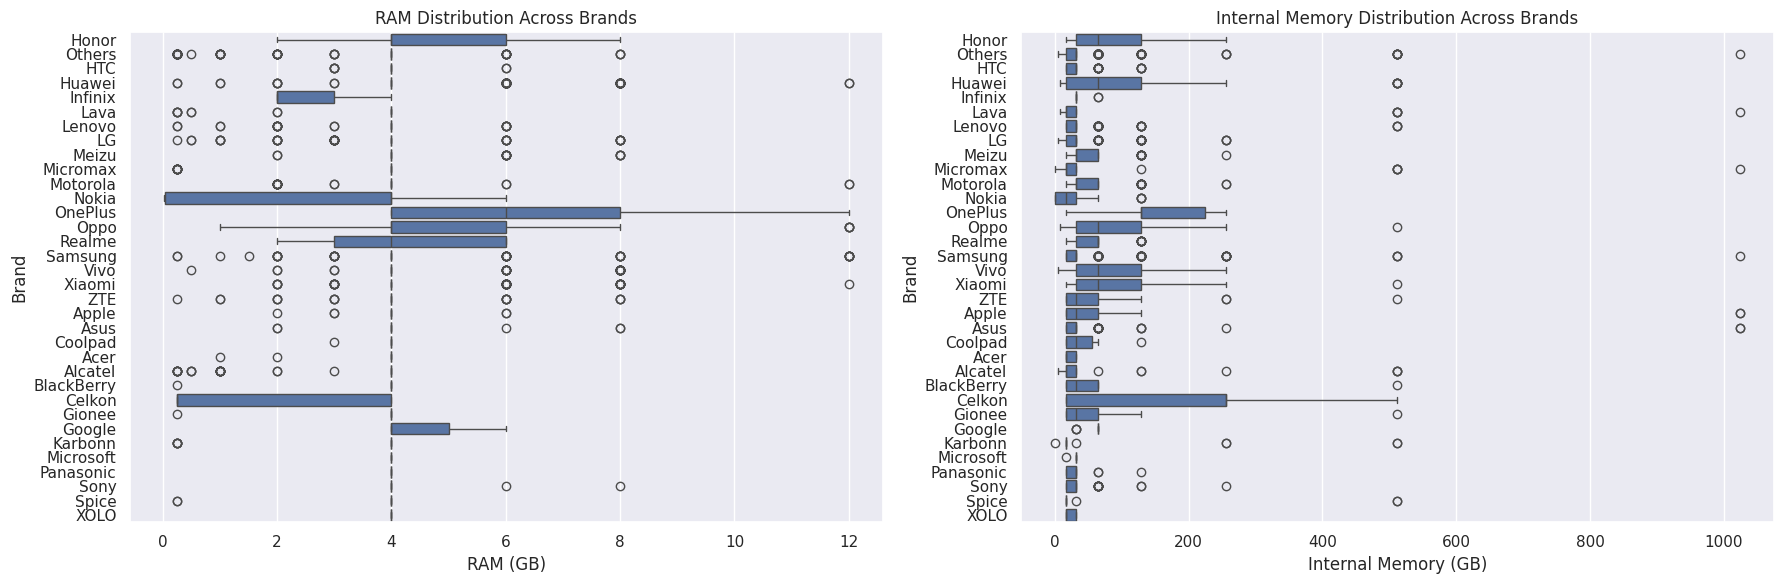

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.boxplot(ax=axes[0], x='ram', y='device_brand', data=data)
sns.boxplot(ax=axes[1],x='internal_memory', y='device_brand', data=data)
axes[0].set_title('RAM Distribution Across Brands')
axes[0].set_xlabel('RAM (GB)')
axes[0].set_ylabel('Brand')
axes[1].set_title('Internal Memory Distribution Across Brands')
axes[1].set_xlabel('Internal Memory (GB)')
axes[1].set_ylabel('Brand')
plt.tight_layout()
plt.show()

**Distribution of RAM and Internal Memory Across Different Brands**: The boxplots for RAM and internal memory distributions across different brands reveal variability in device specifications among brands. Some brands offer a wide range of RAM and internal memory options, catering to both low-end and high-end market segments, while others may target specific segments with more uniform specifications.

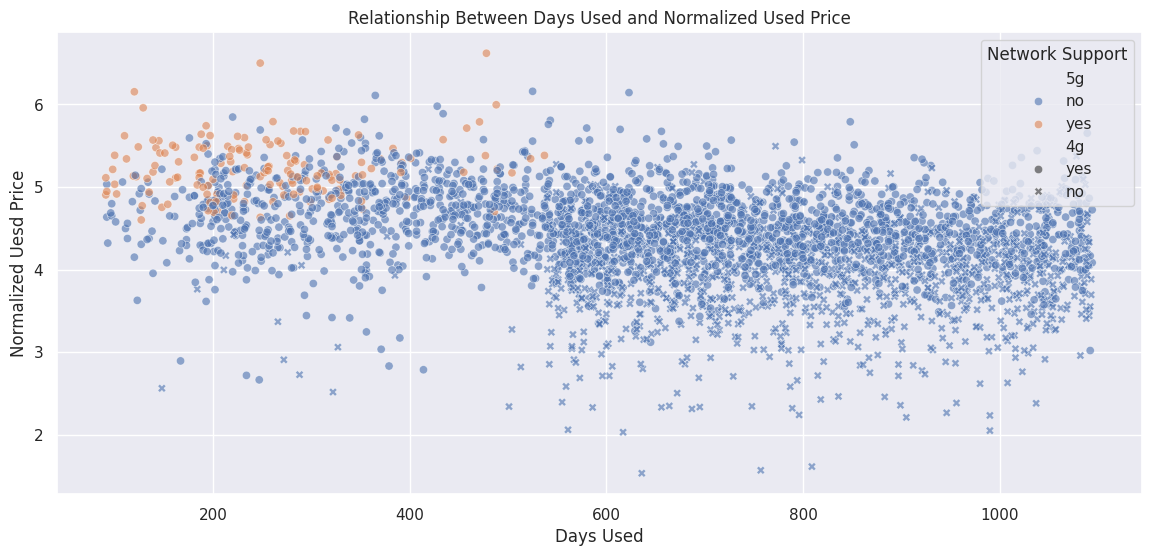

In [32]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='days_used', y='normalized_used_price', data=data, hue='5g', style='4g',alpha=0.6)
plt.title('Relationship Between Days Used and Normalized Used Price')
plt.xlabel('Days Used')
plt.ylabel('Normalized Uesd Price')
plt.legend(title='Network Support', loc='upper right')
plt.show()

**Relationship Between Days Used and Normalized Used Price**:The scatter plot reveals a trend where the normalized used price of mobile devices decreases as the number of days used increases, indicating depreciation over time, with 5G devices generally retaining higher value than 4G devices, suggesting that newer technologies depreciate at a slower rate.

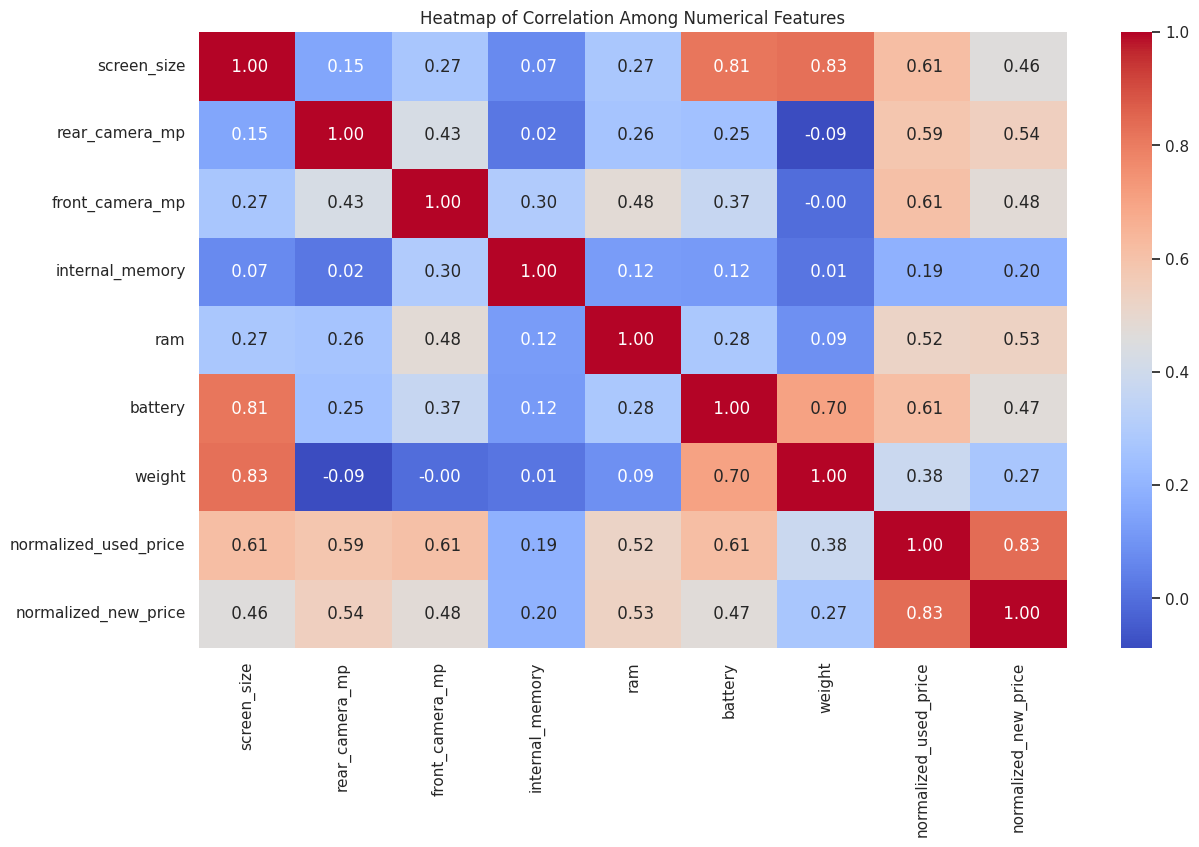

In [37]:
# Calculating the correlation matrix
corr_matrix = data[['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight', 'normalized_used_price', 'normalized_new_price']].corr()

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=" .2f")
plt.title('Heatmap of Correlation Among Numerical Features')
plt.show()

**Correlation Among Numerical Features:**The heatmap of the correlation matrix shows varying degrees of positive and negative correlations among device specifications and prices, highlighting that features such as normalized_used_price and normalized_new_price in the dataset indicates a strong positive linear relationship between these two variables. This suggests that the price of a device when new is a significant predictor of its price on the used market, while also revealing relationships between physical attributes like battery capacity and screen size.

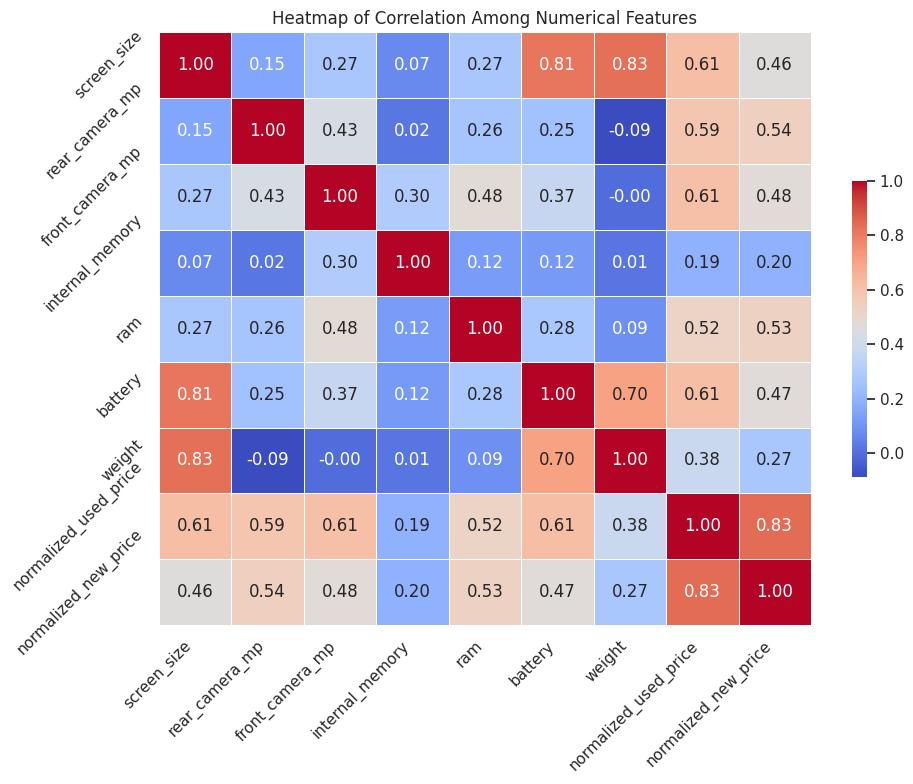

In [38]:
# Calculate the correlation matrix
corr_matrix = data[['screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight', 'normalized_used_price', 'normalized_new_price']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Among Numerical Features')
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()
